In [1]:
import numpy as np
from numpy import math
from statistics import mean
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
from sklearn import datasets
import mpl_toolkits
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
import statsmodels.formula.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats
plt.style.use('ggplot')
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#import tensorflow as tf
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


In [2]:
import pandas as pd

df=pd.read_csv('raw-data.csv',encoding='latin1')

print(df.head())


   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
#Drop uneccessary columns 
df=df.drop(['Row ID', 'Order ID', 'Customer ID', 'Customer Name',
            'Country', 'City', 'Product ID', 'Product Name', 'Postal Code',
            'Discount', 'Quantity'], axis=1)
df

,Order Date,Ship Date,Ship Mode,Segment,State,Region,Category,Sub-Category,Sales,Profit
0,11/8/2016,11/11/2016,Second Class,Consumer,Kentucky,South,Furniture,Bookcases,261.9600,41.9136
1,11/8/2016,11/11/2016,Second Class,Consumer,Kentucky,South,Furniture,Chairs,731.9400,219.5820
2,6/12/2016,6/16/2016,Second Class,Corporate,California,West,Office Supplies,Labels,14.6200,6.8714
3,10/11/2015,10/18/2015,Standard Class,Consumer,Florida,South,Furniture,Tables,957.5775,-383.0310
4,10/11/2015,10/18/2015,Standard Class,Consumer,Florida,South,Office Supplies,Storage,22.3680,2.5164
...,...,...,...,...,...,...,...,...,...,...
9989,1/21/2014,1/23/2014,Second Class,Consumer,Florida,South,Furniture,Furnishings,25.2480,4.1028
9990,2/26/2017,3/3/2017,Standard Class,Consumer,California,West,Furniture,Furnishings,91.9600,15.6332
9991,2/26/2017,3/3/2017,Standard Class,Consumer,California,West,Technology,Phones,258.5760,19.3932
9992,2/26/2017,3/3/2017,Standard Class,Consumer,California,West,Office Supplies,Paper,29.6000,13.3200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    9994 non-null   object 
 1   Ship Date     9994 non-null   object 
 2   Ship Mode     9994 non-null   object 
 3   Segment       9994 non-null   object 
 4   State         9994 non-null   object 
 5   Region        9994 non-null   object 
 6   Category      9994 non-null   object 
 7   Sub-Category  9994 non-null   object 
 8   Sales         9994 non-null   float64
 9   Profit        9994 non-null   float64
dtypes: float64(2), object(8)
memory usage: 780.9+ KB


In [6]:
{columns: len(df[columns].unique()) for columns in df.columns}

{'Order Date': 1237,
 'Ship Date': 1334,
 'Ship Mode': 4,
 'Segment': 3,
 'State': 49,
 'Region': 4,
 'Category': 3,
 'Sub-Category': 17,
 'Sales': 5825,
 'Profit': 7287}

In [7]:
def onehot_encode (df, column):
    dummies = pd.get_dummies (df=[column], prefix=column)
    df = pd.concat ([df.dummies], axis =1)
    df = df.drop(column, axis=1)
    for column in ['Ship Mode', 'State', 'Region', 'Category', 'Sub-Category']:
        df = onehot_encode (df, column = column)
    return df


In [8]:
def encode_dates(df, column):
    
    df[column]= pd.to_datetime (df[column])
    df[column + '_year'] = df [column].apply (lambda x : x.year)
    df[column + '_month'] = df [column].apply (lambda x : x.month)
    df[column + '_day'] = df [column].apply (lambda x : x.day)
    df = df.drop(column, axis = 1)
    return df

In [9]:
def preprocess_inputs(df):
    df=df.copy()
    
    #Extract date features
    
    df = encode_dates (df, 'Order Date')
    df = encode_dates (df, 'Ship Date')
    
    
    return df

In [10]:
df=preprocess_inputs(df)

In [11]:
#Drop uneccessary columns 
df=df.drop(['Order Date_month', 'Order Date_day', 'Ship Date_month', 'Ship Date_day'], axis=1)
df

,Ship Mode,Segment,State,Region,Category,Sub-Category,Sales,Profit,Order Date_year,Ship Date_year
0,Second Class,Consumer,Kentucky,South,Furniture,Bookcases,261.9600,41.9136,2016,2016
1,Second Class,Consumer,Kentucky,South,Furniture,Chairs,731.9400,219.5820,2016,2016
2,Second Class,Corporate,California,West,Office Supplies,Labels,14.6200,6.8714,2016,2016
3,Standard Class,Consumer,Florida,South,Furniture,Tables,957.5775,-383.0310,2015,2015
4,Standard Class,Consumer,Florida,South,Office Supplies,Storage,22.3680,2.5164,2015,2015
...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Florida,South,Furniture,Furnishings,25.2480,4.1028,2014,2014
9990,Standard Class,Consumer,California,West,Furniture,Furnishings,91.9600,15.6332,2017,2017
9991,Standard Class,Consumer,California,West,Technology,Phones,258.5760,19.3932,2017,2017
9992,Standard Class,Consumer,California,West,Office Supplies,Paper,29.6000,13.3200,2017,2017


In [12]:
df1 = pd.get_dummies(df, columns= ['Ship Mode'], prefix = 'Ship Mode', drop_first= True)

In [13]:
df2 = pd.get_dummies(df, columns= ['State'], prefix = 'State', drop_first= True)

In [14]:
df3 = pd.get_dummies(df, columns= ['Region'], prefix = 'Region', drop_first= True)

In [15]:
df4 = pd.get_dummies(df, columns= ['Category'], prefix = 'Category', drop_first= True)

In [16]:
df5 = pd.get_dummies(df, columns= ['Sub-Category'], prefix = 'Sub-Category', drop_first= True)

In [17]:
df6 = pd.get_dummies(df, columns= ['Order Date_year'], prefix = 'Order Date_year', drop_first= True)

In [18]:
df7 = pd.get_dummies(df, columns= ['Ship Date_year'], prefix = 'Ship Date_year', drop_first= True)

In [19]:
#df13 = pd.get_dummies(df, columns= ['Postal Code'], prefix = 'Postal Code', drop_first= True)

In [20]:
df1=df1.drop(['Segment','State', 'Region', 'Category', 'Sub-Category','Order Date_year', 'Ship Date_year'], axis=1)
df1

,Sales,Profit,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class
0,261.9600,41.9136,0,1,0
1,731.9400,219.5820,0,1,0
2,14.6200,6.8714,0,1,0
3,957.5775,-383.0310,0,0,1
4,22.3680,2.5164,0,0,1
...,...,...,...,...,...
9989,25.2480,4.1028,0,1,0
9990,91.9600,15.6332,0,0,1
9991,258.5760,19.3932,0,0,1
9992,29.6000,13.3200,0,0,1


In [21]:
df2=df2.drop(['Segment','Ship Mode','Region', 'Category', 'Sub-Category','Sales', 'Profit', 'Order Date_year', 'Ship Date_year'], axis=1)
df2

,State_Arizona,State_Arkansas,State_California,State_Colorado,State_Connecticut,State_Delaware,State_District of Columbia,State_Florida,State_Georgia,State_Idaho,...,State_South Dakota,State_Tennessee,State_Texas,State_Utah,State_Vermont,State_Virginia,State_Washington,State_West Virginia,State_Wisconsin,State_Wyoming
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9990,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9991,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9992,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
df3=df3.drop(['Segment','Ship Mode','State', 'Category', 'Sub-Category', 'Sales', 'Profit','Order Date_year', 'Ship Date_year'], axis=1)
df3

,Region_East,Region_South,Region_West
0,0,1,0
1,0,1,0
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
9989,0,1,0
9990,0,0,1
9991,0,0,1
9992,0,0,1


In [23]:
df4=df4.drop(['Segment','Ship Mode','State', 'Region', 'Sub-Category','Sales', 'Profit','Order Date_year', 'Ship Date_year'], axis=1)
df4

,Category_Office Supplies,Category_Technology
0,0,0
1,0,0
2,1,0
3,0,0
4,1,0
...,...,...
9989,0,0
9990,0,0
9991,0,1
9992,1,0


In [24]:
df5=df5.drop(['Segment','Ship Mode','State', 'Region', 'Category', 'Sales', 'Profit','Order Date_year', 'Ship Date_year'], axis=1)
df5

,Sub-Category_Appliances,Sub-Category_Art,Sub-Category_Binders,Sub-Category_Bookcases,Sub-Category_Chairs,Sub-Category_Copiers,Sub-Category_Envelopes,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
9990,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
9991,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9992,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [25]:
df6=df6.drop(['Segment','Ship Mode','State', 'Region', 'Category', 'Sales', 'Profit', 'Ship Date_year', 'Sub-Category'], axis=1)
df6

,Order Date_year_2015,Order Date_year_2016,Order Date_year_2017
0,0,1,0
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
9989,0,0,0
9990,0,0,1
9991,0,0,1
9992,0,0,1


In [26]:
df7=df7.drop(['Segment','Ship Mode','State', 'Region', 'Category', 'Sales', 'Profit', 'Order Date_year', 'Sub-Category'], axis=1)
df7

,Ship Date_year_2015,Ship Date_year_2016,Ship Date_year_2017,Ship Date_year_2018
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
9989,0,0,0,0
9990,0,0,1,0
9991,0,0,1,0
9992,0,0,1,0


In [27]:
#df13=df13.drop(['Customer ID', 'Customer Name', 'City', 'Product ID','Product Name','Segment','Ship Mode','State', 'Region', 'Category', 'Sales', 'Profit', 'Order Date_year', 'Sub-Category'], axis=1)
#df13

In [28]:
df_dummies=pd.concat([df1, df2, df3, df4, df5, df6, df7], axis =1)
df_dummies

,Sales,Profit,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,State_Arizona,State_Arkansas,State_California,State_Colorado,State_Connecticut,...,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables,Order Date_year_2015,Order Date_year_2016,Order Date_year_2017,Ship Date_year_2015,Ship Date_year_2016,Ship Date_year_2017,Ship Date_year_2018
0,261.9600,41.9136,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,731.9400,219.5820,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,14.6200,6.8714,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
3,957.5775,-383.0310,0,0,1,0,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
4,22.3680,2.5164,0,0,1,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,25.2480,4.1028,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9990,91.9600,15.6332,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
9991,258.5760,19.3932,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
9992,29.6000,13.3200,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0


In [29]:
#Split df into x and y
y = df_dummies ['Sales']
X = df_dummies.drop ('Sales', axis =1)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=1)

In [31]:
#import LinearRegression
from sklearn.linear_model import LinearRegression
#import os,sys
#from scipy import stats



In [32]:
lm = LinearRegression()

In [33]:
lm.fit(X_train,y_train)

LinearRegression()

In [34]:
#intercept
print(lm.intercept_)


348.4022703117821


In [35]:
#Coefficient
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Profit,1.215633
Ship Mode_Same Day,14.082160
Ship Mode_Second Class,26.406930
Ship Mode_Standard Class,14.693502
State_Arizona,1.206114
...,...
Order Date_year_2017,199.676466
Ship Date_year_2015,-56.912358
Ship Date_year_2016,-102.835777
Ship Date_year_2017,-224.298501


In [36]:
#predict test
pred = lm.predict(X_test)
pred

array([ 675.4475999 ,  276.69602564,   29.75503584, ..., 1592.92163794,
         77.96945219,  186.21066415])

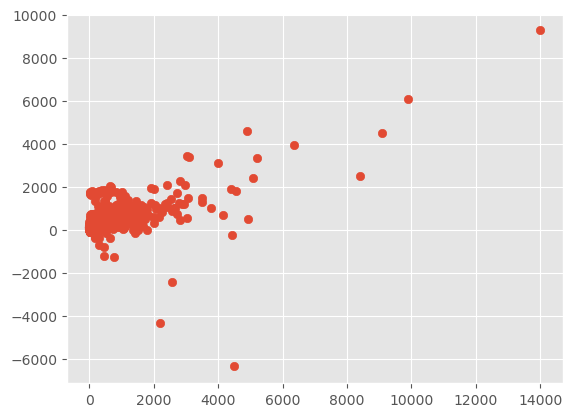

In [37]:
#scatter plot
plt.scatter(y_test,pred)

In [38]:
#add constant to predictor variables
import statsmodels.api as sm
X = sm.add_constant(X)

#fit linear regression model
model = sm.OLS(y, X).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     82.31
Date:                Thu, 23 Feb 2023   Prob (F-statistic):               0.00
Time:                        06:09:11   Log-Likelihood:                -76073.
No. Observations:                9994   AIC:                         1.523e+05
Df Residuals:                    9918   BIC:                         1.528e+05
Df Model:                          75                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [39]:
#df_dummies2 = df_dummies 

In [40]:
df_dummies2=df_dummies.drop(['Ship Mode_Same Day', 'Ship Mode_Second Class', 'Ship Mode_Standard Class', 'State_Arizona', 
                             'State_Connecticut', 'State_Arkansas','State_Kentucky','State_Delaware', 'State_District of Columbia', 'State_Idaho', 'State_Illinois', 
                             'State_Indiana', 'State_Iowa', 'State_Kansas', 'State_Louisiana', 'State_Maine', 'State_Maryland', 
                             'State_Massachusetts', 'State_Pennsylvania', 'State_Michigan', 'State_Minnesota', 'State_Mississippi', 'State_Missouri', 
                             'State_Montana', 'State_Nebraska', 'State_Nevada', 'State_New Hampshire', 'State_New Jersey', 
                             'State_New Mexico', 'State_Ohio', 'State_Oklahoma', 'State_Oregon', 'State_Rhode Island', 'State_North Dakota',
                             'State_South Carolina', 'State_South Dakota', 'State_Texas', 'State_Utah', 'State_Vermont', 'State_Colorado',
                             'State_West Virginia', 'State_Wisconsin', 'State_Wyoming', 'Sub-Category_Binders', 'Sub-Category_Envelopes',
                             'Ship Date_year_2018', 'Sub-Category_Supplies', 'Sub-Category_Tables'], axis=1)

In [41]:
df_dummies2

,Sales,Profit,State_California,State_Florida,State_Georgia,State_New York,State_North Carolina,State_Tennessee,State_Virginia,State_Washington,...,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Order Date_year_2015,Order Date_year_2016,Order Date_year_2017,Ship Date_year_2015,Ship Date_year_2016,Ship Date_year_2017
0,261.9600,41.9136,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,731.9400,219.5820,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,14.6200,6.8714,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,957.5775,-383.0310,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,22.3680,2.5164,0,1,0,0,0,0,0,0,...,0,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,25.2480,4.1028,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9990,91.9600,15.6332,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
9991,258.5760,19.3932,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
9992,29.6000,13.3200,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1


In [42]:
#Split df into x and y
y = df_dummies2 ['Sales']
X = df_dummies2.drop ('Sales', axis =1)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=1)

In [44]:
#import LinearRegression
from sklearn.linear_model import LinearRegression

In [45]:
lm = LinearRegression()

In [46]:
lm.fit(X_train,y_train)

LinearRegression()

In [47]:
#intercept
print(lm.intercept_)


739.7237588487466


In [48]:
#Coefficient
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Profit,1.099083
State_California,-3.096470
State_Florida,92.782691
State_Georgia,13.040386
State_New York,5.675311
State_North Carolina,98.574471
State_Tennessee,55.098554
State_Virginia,67.723215
State_Washington,10.067135
Region_East,-6.349126


In [49]:
#predict test
pred = lm.predict(X_test)
pred

array([677.90400916, 281.5212496 ,  24.49739407, ...,  24.32451902,
        43.64166976,  86.56888022])

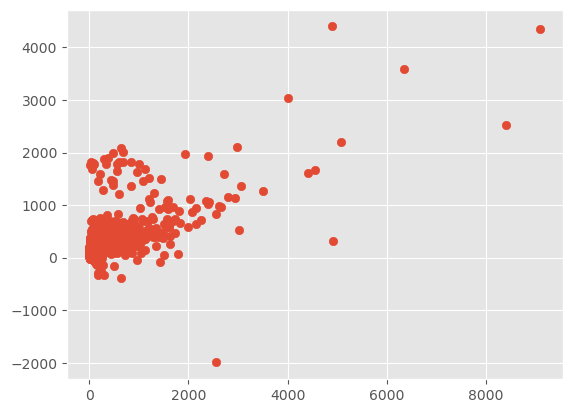

In [50]:
#scatter plot
plt.scatter(y_test,pred)

In [51]:
#add constant to predictor variables
import statsmodels.api as sm
X = sm.add_constant(X)

#fit linear regression model
model = sm.OLS(y, X).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.378
Method:                 Least Squares   F-statistic:                     191.2
Date:                Thu, 23 Feb 2023   Prob (F-statistic):               0.00
Time:                        06:09:12   Log-Likelihood:                -76099.
No. Observations:                9994   AIC:                         1.523e+05
Df Residuals:                    9961   BIC:                         1.525e+05
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

/var/folders/17/br7lhr0d49z5kcbl73nl58vh0000gn/T/ipykernel_58240/416555715.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


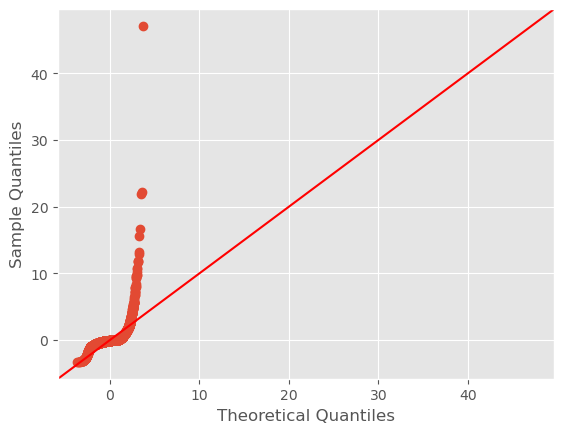

In [52]:
#create the baseline model, using statsmodel
import scipy.stats as stats
import statsmodels as sm
import statsmodels.api as sm


residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

/Users/reffer/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


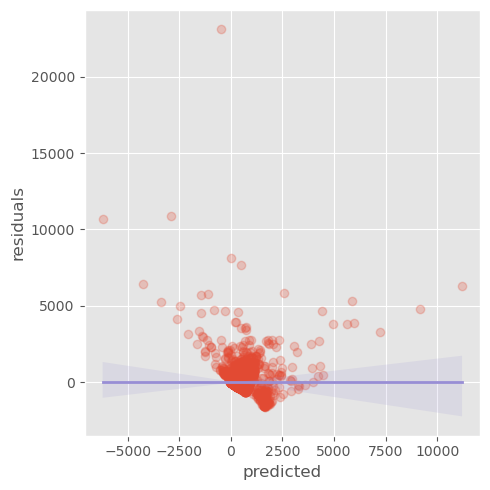

In [53]:
#Homoscedasticity
fig, ax = plt.subplots(figsize=(5, 5))
sns.regplot(model.fittedvalues,model.resid, scatter_kws={'alpha': 0.25}, line_kws={'color': 'C2', 'lw': 2}, ax=ax)
ax.set_xlabel('predicted')
ax.set_ylabel('residuals')
plt.tight_layout()
plt.show()


In [54]:
#Database predictor
data_pred = df_dummies2.iloc[:,1:85]
data_pred.head()

,Profit,State_California,State_Florida,State_Georgia,State_New York,State_North Carolina,State_Tennessee,State_Virginia,State_Washington,Region_East,...,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Order Date_year_2015,Order Date_year_2016,Order Date_year_2017,Ship Date_year_2015,Ship Date_year_2016,Ship Date_year_2017
0,41.9136,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,219.5820,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,6.8714,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,-383.0310,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,2.5164,0,1,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,1,0,0


In [55]:
#correlation
data_pred.corr()

,Profit,State_California,State_Florida,State_Georgia,State_New York,State_North Carolina,State_Tennessee,State_Virginia,State_Washington,Region_East,...,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Order Date_year_2015,Order Date_year_2016,Order Date_year_2017,Ship Date_year_2015,Ship Date_year_2016,Ship Date_year_2017
Profit,1.000000,0.020323,-0.031985,0.034880,0.056310,-0.040084,-0.033726,0.035144,0.036828,0.009376,...,0.000357,-0.006466,0.028569,-0.004550,0.001448,0.007470,-0.001336,0.001891,0.008849,-0.002095
State_California,0.020323,1.000000,-0.099881,-0.068524,-0.178468,-0.079979,-0.068334,-0.075761,-0.115546,-0.315869,...,-0.000059,0.010686,-0.005266,-0.008431,-0.014641,0.004584,-0.000069,-0.013229,0.005620,0.000358
State_Florida,-0.031985,-0.099881,1.000000,-0.027339,-0.071204,-0.031910,-0.027264,-0.030227,-0.046100,-0.126024,...,0.007784,-0.002277,-0.000127,-0.013896,0.005685,-0.015638,-0.001025,0.004242,-0.018819,0.002681
State_Georgia,0.034880,-0.068524,-0.027339,1.000000,-0.048850,-0.021892,-0.018704,-0.020737,-0.031627,-0.086460,...,-0.007797,0.012502,-0.000961,-0.001539,0.002374,0.009126,0.001617,0.001392,0.009419,0.001880
State_New York,0.056310,-0.178468,-0.071204,-0.048850,1.000000,-0.057016,-0.048715,-0.054009,-0.082372,0.565005,...,0.008955,-0.004256,0.009620,0.002856,0.019205,0.020222,-0.014657,0.020443,0.021702,-0.018690
State_North Carolina,-0.040084,-0.079979,-0.031910,-0.021892,-0.057016,1.000000,-0.021831,-0.024204,-0.036914,-0.100913,...,0.006831,0.003484,0.010938,-0.011711,-0.008461,0.013990,0.003385,-0.009551,0.014335,0.003693
State_Tennessee,-0.033726,-0.068334,-0.027264,-0.018704,-0.048715,-0.021831,1.000000,-0.020680,-0.031540,-0.086220,...,-0.000740,0.001983,-0.019081,0.006727,0.004597,-0.014262,0.032271,0.005429,-0.017409,0.034141
State_Virginia,0.035144,-0.075761,-0.030227,-0.020737,-0.054009,-0.024204,-0.020680,1.000000,-0.034968,-0.095591,...,-0.003661,-0.009250,0.002551,0.002521,0.004788,0.004655,-0.044853,0.003692,0.004972,-0.044594
State_Washington,0.036828,-0.115546,-0.046100,-0.031627,-0.082372,-0.036914,-0.031540,-0.034968,1.000000,-0.145790,...,0.005039,-0.013752,-0.016049,0.010111,-0.035192,-0.009358,0.045872,-0.036652,-0.008893,0.043435
Region_East,0.009376,-0.315869,-0.126024,-0.086460,0.565005,-0.100913,-0.086220,-0.095591,-0.145790,1.000000,...,0.008788,-0.007998,0.014530,0.000728,0.024471,0.014565,-0.010748,0.030159,0.012841,-0.009076


In [56]:
data_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Profit                    9994 non-null   float64
 1   State_California          9994 non-null   uint8  
 2   State_Florida             9994 non-null   uint8  
 3   State_Georgia             9994 non-null   uint8  
 4   State_New York            9994 non-null   uint8  
 5   State_North Carolina      9994 non-null   uint8  
 6   State_Tennessee           9994 non-null   uint8  
 7   State_Virginia            9994 non-null   uint8  
 8   State_Washington          9994 non-null   uint8  
 9   Region_East               9994 non-null   uint8  
 10  Region_South              9994 non-null   uint8  
 11  Region_West               9994 non-null   uint8  
 12  Category_Office Supplies  9994 non-null   uint8  
 13  Category_Technology       9994 non-null   uint8  
 14  Sub-Cate

In [57]:
abs(data_pred.corr()) > 0.75

,Profit,State_California,State_Florida,State_Georgia,State_New York,State_North Carolina,State_Tennessee,State_Virginia,State_Washington,Region_East,...,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Order Date_year_2015,Order Date_year_2016,Order Date_year_2017,Ship Date_year_2015,Ship Date_year_2016,Ship Date_year_2017
Profit,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
State_California,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
State_Florida,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
State_Georgia,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
State_New York,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
State_North Carolina,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
State_Tennessee,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
State_Virginia,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
State_Washington,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
Region_East,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [58]:
#Checking how much are correlated the variables
data=data_pred.corr().abs().stack().reset_index().sort_values(0, ascending=False)
data['pairs'] = list(zip(data.level_0, data.level_1))
data.set_index(['pairs'], inplace = True)
data.drop(columns=['level_1', 'level_0'], inplace = True)
data.columns = ['cc']
data.drop_duplicates(inplace=True)
data

,cc
pairs,
"(Profit, Profit)",1.000000
"(Order Date_year_2016, Ship Date_year_2016)",0.985122
"(Order Date_year_2017, Ship Date_year_2017)",0.983056
"(Order Date_year_2015, Ship Date_year_2015)",0.976959
"(Region_West, State_California)",0.728546
...,...
"(State_North Carolina, Sub-Category_Labels)",0.000237
"(Sub-Category_Art, State_New York)",0.000184
"(State_Florida, Sub-Category_Phones)",0.000127


<function seaborn.matrix.heatmap(data, *, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)>

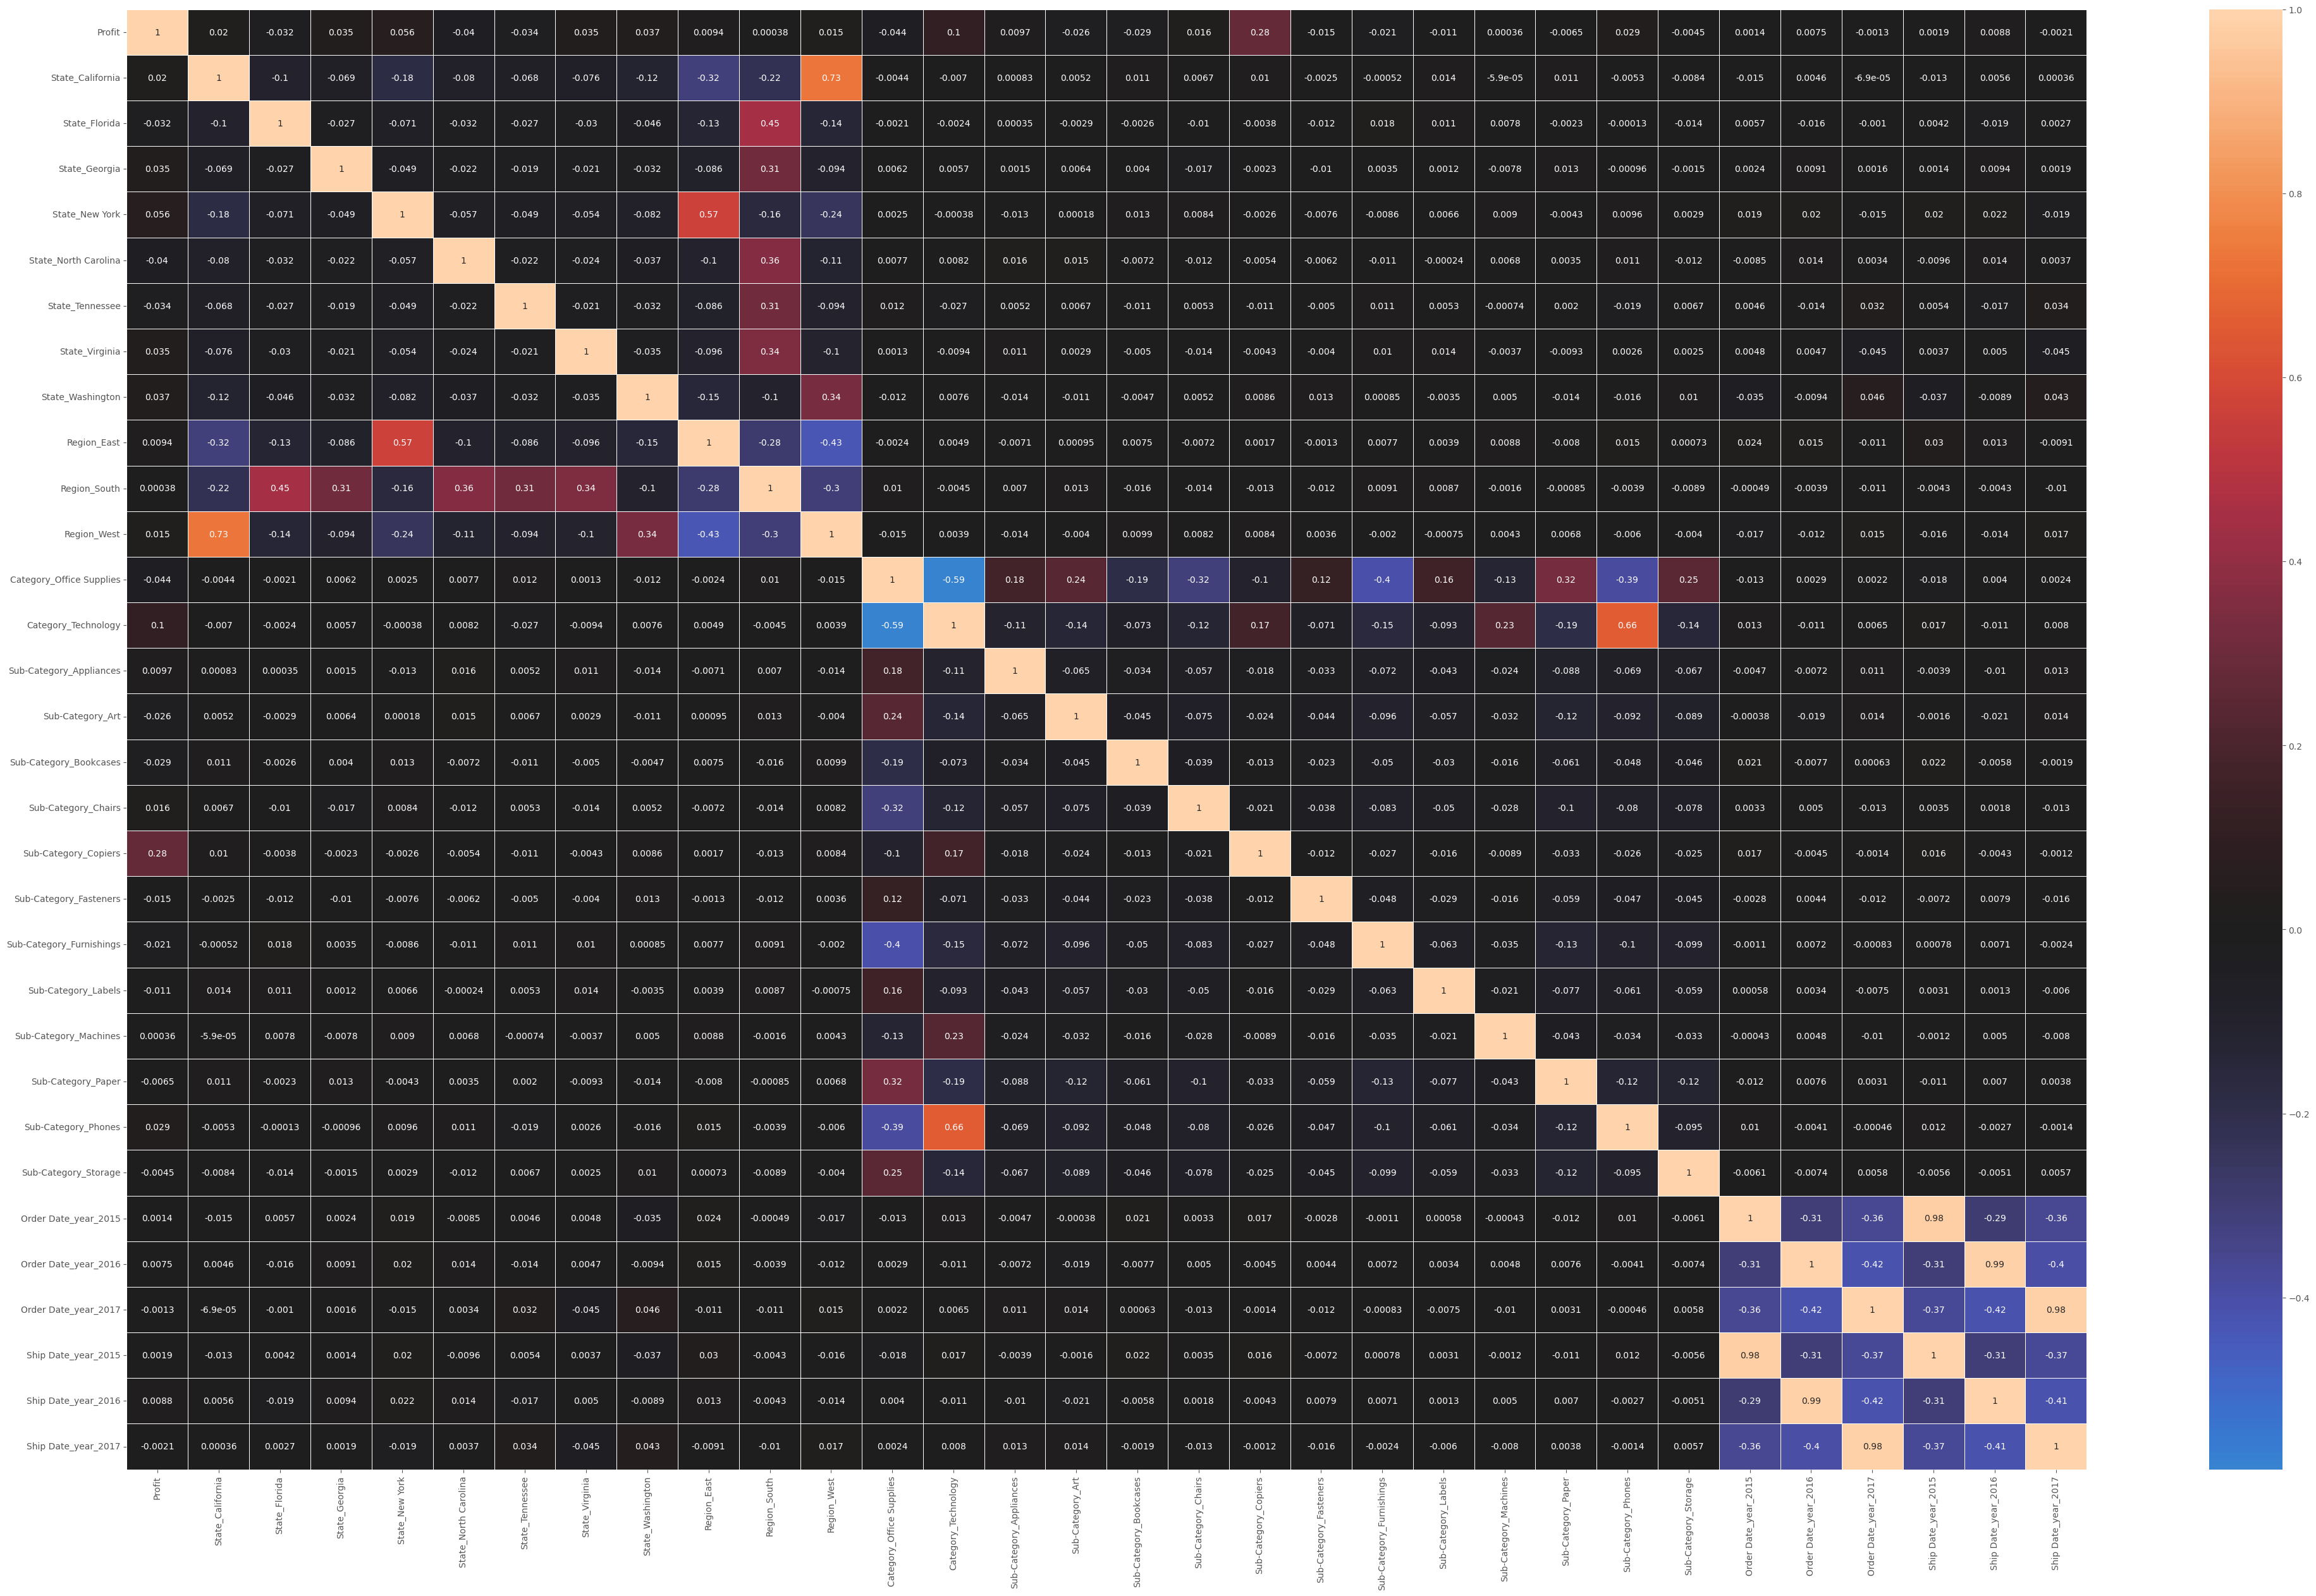

In [59]:
#correlation plot
fig, ax = plt.subplots(figsize=(50, 30))
sns.heatmap(data=data_pred.corr(), linewidths=0.5, center=0, annot=True, ax=ax)
sns.heatmap

In [60]:
#scatter plot data prediction
#pd.plotting.scatter_matrix(data_pred,figsize  = [25, 25]);
#plt.show()

In [61]:
#Natural logarithm
#x = np.linspace(start=-100, stop=100, num=10**3)
#y = np.log(x)
#plt.plot(x, y);

In [62]:
#importing data 

df_dummies2

,Sales,Profit,State_California,State_Florida,State_Georgia,State_New York,State_North Carolina,State_Tennessee,State_Virginia,State_Washington,...,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Order Date_year_2015,Order Date_year_2016,Order Date_year_2017,Ship Date_year_2015,Ship Date_year_2016,Ship Date_year_2017
0,261.9600,41.9136,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,731.9400,219.5820,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,14.6200,6.8714,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,957.5775,-383.0310,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,22.3680,2.5164,0,1,0,0,0,0,0,0,...,0,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,25.2480,4.1028,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9990,91.9600,15.6332,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
9991,258.5760,19.3932,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
9992,29.6000,13.3200,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1


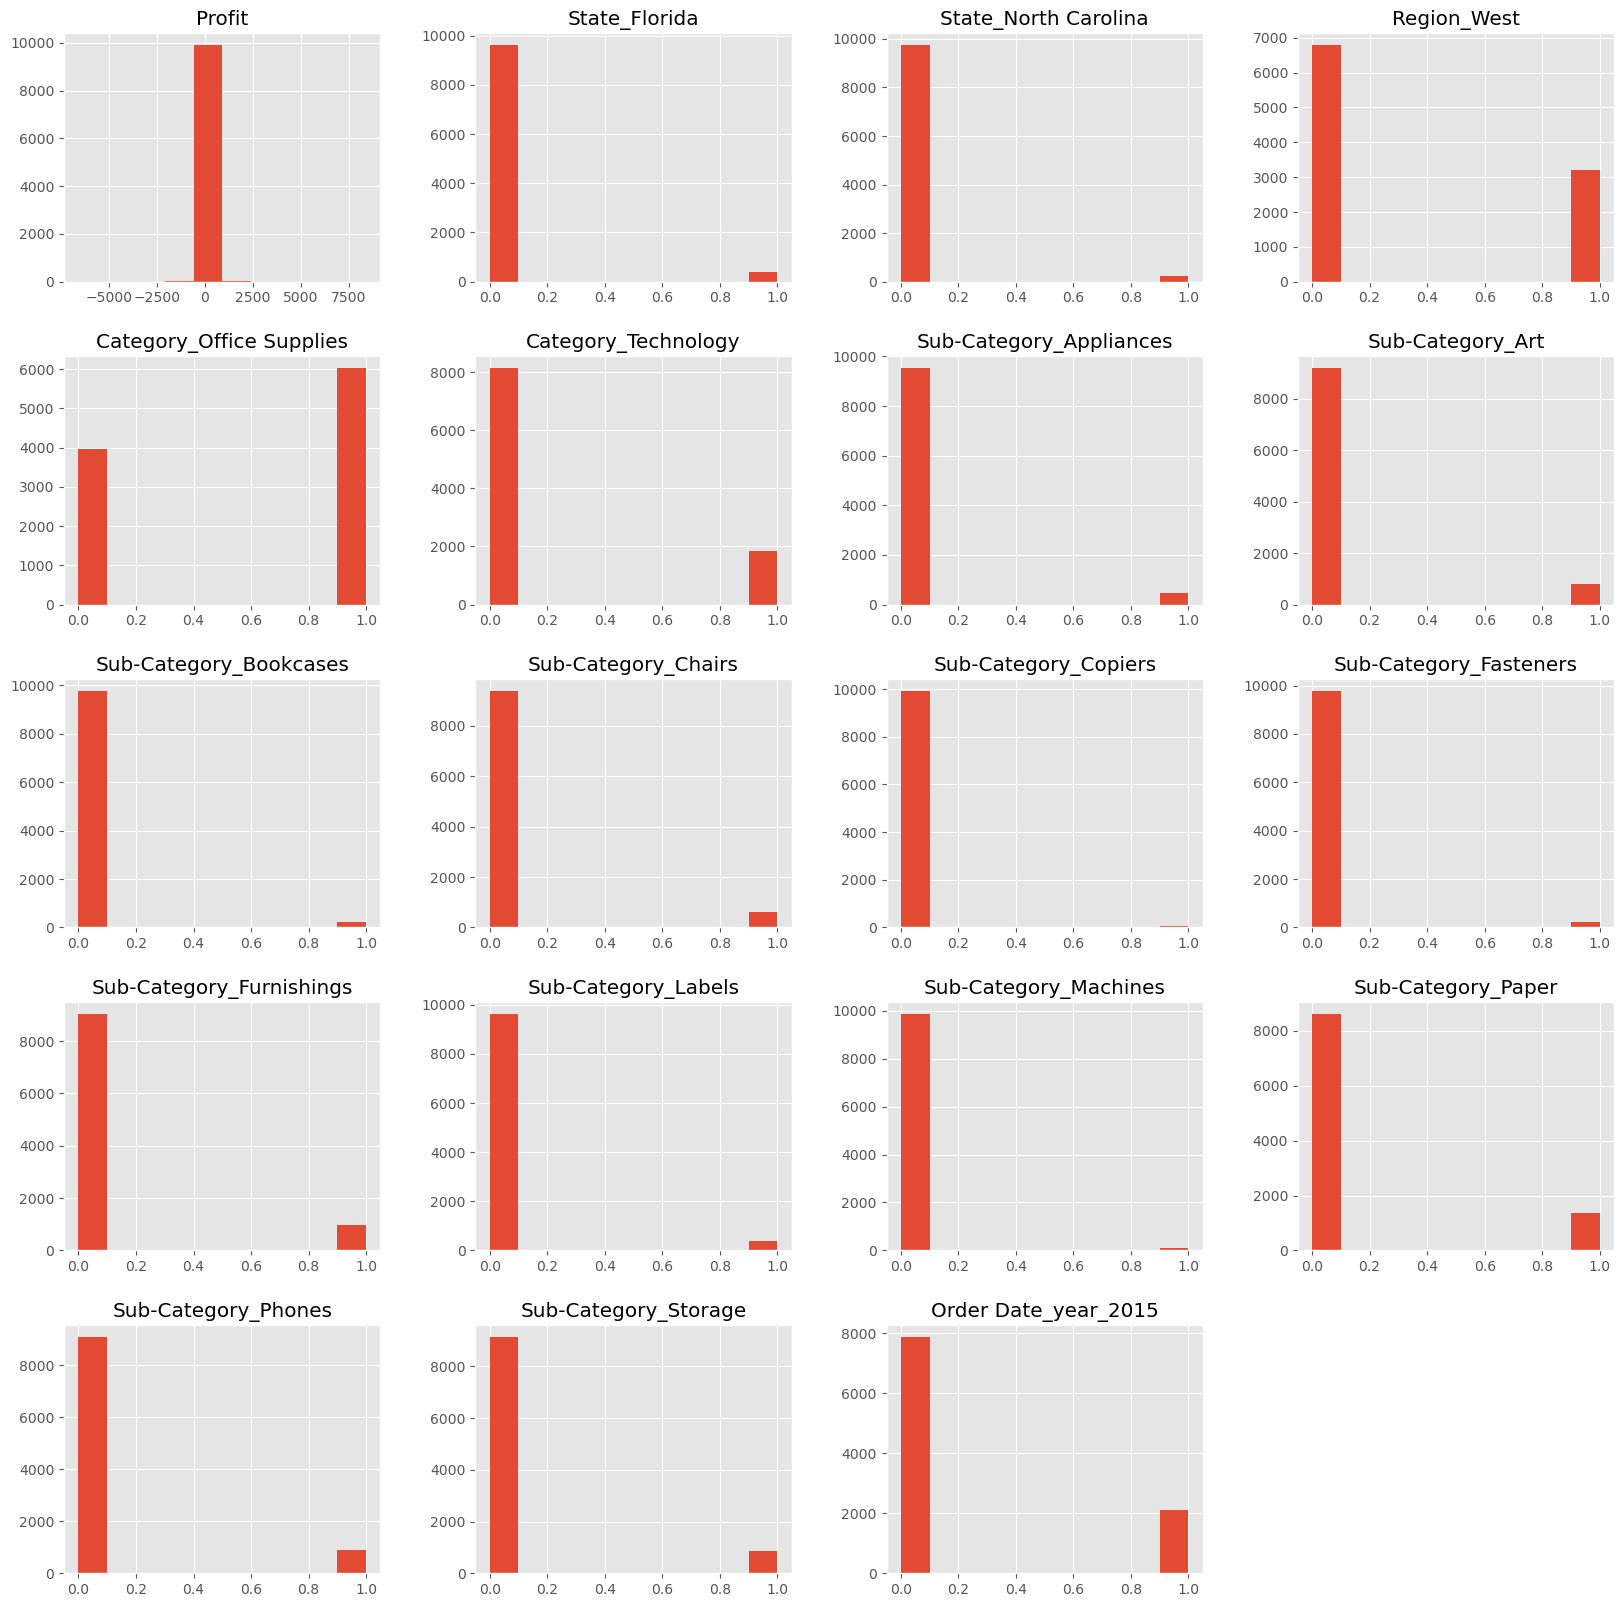

In [63]:
#plot XXXXXXXXXXXX
#data_pred[['Category_Office Supplies', 'Category_Technology', 'Sub-Category_Appliances', 
#           'Sub-Category_Art','Sub-Category_Bookcases', 'Sub-Category_Chairs', 'Sub-Category_Phones', 
#           'Sub-Category_Storage','Order Date_year_2015','Order Date_year_2016',
#           'Order Date_year_2017','Ship Date_year_2015','Ship Date_year_2016','Ship Date_year_2017']].hist(figsize  = [20, 20]);
data_pred[['Profit', 'State_Florida','State_North Carolina', 'Region_West', 
           'Category_Office Supplies', 'Category_Technology', 'Sub-Category_Appliances', 'Sub-Category_Art',
           'Sub-Category_Bookcases', 'Sub-Category_Chairs', 'Sub-Category_Copiers', 'Sub-Category_Fasteners', 
           'Sub-Category_Furnishings', 'Sub-Category_Labels', 'Sub-Category_Machines', 'Sub-Category_Paper', 
           'Sub-Category_Phones', 'Sub-Category_Storage', 'Order Date_year_2015']].hist(figsize  = [20, 20]);

In [64]:
#Dataframe XXXXXXXX
new = df_dummies2[['Sales','Profit', 'State_Florida',
                   'State_North Carolina', 'Region_West', 
                   'Category_Office Supplies', 'Category_Technology', 'Sub-Category_Appliances', 'Sub-Category_Art',
                   'Sub-Category_Bookcases', 'Sub-Category_Chairs', 'Sub-Category_Copiers', 'Sub-Category_Fasteners', 
                   'Sub-Category_Furnishings', 'Sub-Category_Labels', 'Sub-Category_Machines', 'Sub-Category_Paper', 
                   'Sub-Category_Phones', 'Sub-Category_Storage', 'Order Date_year_2015']]
new

,Sales,Profit,State_Florida,State_North Carolina,Region_West,Category_Office Supplies,Category_Technology,Sub-Category_Appliances,Sub-Category_Art,Sub-Category_Bookcases,Sub-Category_Chairs,Sub-Category_Copiers,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Order Date_year_2015
0,261.9600,41.9136,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,731.9400,219.5820,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,14.6200,6.8714,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,957.5775,-383.0310,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,22.3680,2.5164,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,25.2480,4.1028,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
9990,91.9600,15.6332,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
9991,258.5760,19.3932,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
9992,29.6000,13.3200,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [65]:
#Split df into x and y
y = new ['Sales']
X = new.drop ('Sales', axis =1)

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=1)

In [67]:
#import LinearRegression
from sklearn.linear_model import LinearRegression

In [68]:
lm = LinearRegression()

In [69]:
lm.fit(X_train,y_train)

LinearRegression()

In [70]:
#intercept
print(lm.intercept_)


720.5680757543957


In [71]:
#Coefficient
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Profit,1.098968
State_Florida,66.082254
State_North Carolina,70.008802
Region_West,-17.800379
Category_Office Supplies,-595.892525
Category_Technology,-561.883838
Sub-Category_Appliances,68.687139
Sub-Category_Art,-98.443168
Sub-Category_Bookcases,-207.810040
Sub-Category_Chairs,-224.122632


In [72]:
#predict test
pred = lm.predict(X_test)
pred

array([683.07275536, 242.31341695,  33.54975272, ...,  27.54488217,
        29.36839833,  95.46937028])

In [73]:
#predict test
pred = lm.predict(X_test)
pred

array([683.07275536, 242.31341695,  33.54975272, ...,  27.54488217,
        29.36839833,  95.46937028])

In [74]:
#add constant to predictor variables
import statsmodels.api as sm
X = sm.add_constant(X)

#fit linear regression model
model = sm.OLS(y, X).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     321.9
Date:                Thu, 23 Feb 2023   Prob (F-statistic):               0.00
Time:                        06:09:18   Log-Likelihood:                -76102.
No. Observations:                9994   AIC:                         1.522e+05
Df Residuals:                    9974   BIC:                         1.524e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [75]:
y = new ['Sales']
X = new.drop ('Sales', axis =1)

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=1)

In [77]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [78]:
X_train[0:16]

array([[0.44185869, 0.        , 0.        , 1.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        ],
       [0.44123583, 0.        , 0.        , 1.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        ],
       [0.43705347, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.38893226, 0.        , 0.        , 0.        , 1.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.   

In [79]:
#Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [80]:
#Predicting the Test set results
y_pred = regressor.predict(X_test)

In [81]:
math.sqrt(mean_squared_error(y_test, y_pred))

398.9936528855754

In [82]:
r2_score(y_test, y_pred)

0.4586771674668991

In [83]:
#add constant to predictor variables
import statsmodels.api as sm
X = sm.add_constant(X)

#fit linear regression model
model = sm.OLS(y, X).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     321.9
Date:                Thu, 23 Feb 2023   Prob (F-statistic):               0.00
Time:                        06:09:19   Log-Likelihood:                -76102.
No. Observations:                9994   AIC:                         1.522e+05
Df Residuals:                    9974   BIC:                         1.524e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [84]:
#log function
data_log = pd.DataFrame([])
data_log['logpro'] = np.log(data_pred['Profit'])
data_log['logsup'] = np.log(data_pred['Category_Office Supplies'])
data_log['logtec'] = np.log(data_pred['Category_Technology'])
data_log['logapp'] = np.log(data_pred['Sub-Category_Appliances'])
data_log['logart'] = np.log(data_pred['Sub-Category_Art'])
data_log['logboo'] = np.log(data_pred['Sub-Category_Bookcases'])
data_log['logcha'] = np.log(data_pred['Sub-Category_Chairs'])
data_log['logpho'] = np.log(data_pred['Sub-Category_Phones'])
data_log['logsto'] = np.log(data_pred['Sub-Category_Storage'])
data_log['logtab'] = np.log(data_pred['Sub-Category_Tables'])
data_log['logy15'] = np.log(data_pred['Order Date_year_2015'])
data_log['logy16'] = np.log(data_pred['Order Date_year_2016'])
data_log['logy17'] = np.log(data_pred['Order Date_year_2017'])
data_log['logs15'] = np.log(data_pred['Ship Date_year_2015'])
data_log['logs16'] = np.log(data_pred['Ship Date_year_2016'])
data_log['logs17'] = np.log(data_pred['Ship Date_year_2017'])

plt.hist(df['X'].dropna().values)
plt.show()

plt.hist(figsize  = [100, 100]);

/Users/reffer/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/reffer/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/reffer/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/reffer/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/reffer/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/reffer/opt/anaconda3/lib/python3.9/site-packages/

KeyError: 'Sub-Category_Tables'

In [ ]:
#log function
data_log = pd.DataFrame([])
data_log['logsup'] = np.log(data_pred['Category_Office Supplies'])
data_log['logtec'] = np.log(data_pred['Category_Technology'])
data_log['logapp'] = np.log(data_pred['Sub-Category_Appliances'])
data_log['logpro'] = np.log(data_pred['Profit'])
data_log.hist(figsize  = [100, 100]);

In [ ]:
#plot with sqft_living', 'grade', 'sqft_living15', 'price'
data_pred[['Profit', 'Category_Office Supplies', 'Category_Technology', 'Sub-Category_Appliances', 'Sub-Category_Art',
           'Sub-Category_Bookcases', 'Sub-Category_Chairs', 'Sub-Category_Copiers', 'Sub-Category_Fasteners',
           'Sub-Category_Furnishings', 'Sub-Category_Labels', 'Sub-Category_Machines', 'Sub-Category_Paper', 
           'Sub-Category_Phones', 'Sub-Category_Storage', 'Sub-Category_Supplies', 'Sub-Category_Tables']].hist(figsize  = [6, 6]);
data

In [ ]:
#log function
data_log = pd.DataFrame([])
data_log['logliv'] = np.log(data_pred['sqft_living'])
data_log['loggra'] = np.log(data_pred['grade'])
data_log['logl15'] = np.log(data_pred['sqft_living15'])
data_log['logpri'] = np.log(data_pred['price'])
data_log.hist(figsize  = [6, 6]);

In [ ]:
outcome = 'price'
predictor = 'sqft_living'
formula = outcome + '~' + predictor
model = ols(formula=formula, data=data).fit()
model.summary()

In [ ]:
data['logliv'] = np.log(data['sqft_living'])
outcome = 'price'
predictor = 'logliv'
formula = outcome + '~' + predictor
model = ols(formula=formula, data=data).fit()
model.summary()

In [ ]:
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()


In [ ]:
#df_dummies2=df_dummies.drop(['Ship Mode_Same Day', 'Ship Mode_Second Class', 'Ship Mode_Standard Class', 'State_Arizona', 'State_Arkansas',
#                             'State_California', 'State_Colorado', 'State_Connecticut','State_Delaware', 'State_District of Columbia', 
#                             'State_Florida','State_Georgia', 'State_Idaho', 'State_Illinois', 'State_Indiana', 'State_Iowa', 'State_Kansas',
#                             'State_Kentucky', 'State_Louisiana', 'State_Maine', 'State_Maryland', 'State_Massachusetts', 'State_Michigan',
#                             'State_Minnesota', 'State_Mississippi', 'State_Missouri', 'State_Montana', 'State_Nebraska', 'State_Nevada', 
#                             'State_New Hampshire', 'State_New Jersey', 'State_New Mexico', 'State_New York', 'State_North Carolina',  
#                             'State_North Dakota', 'State_Ohio', 'State_Oklahoma', 'State_Oregon', 'State_Pennsylvania', 'State_Rhode Island',
#                             'State_South Carolina', 'State_South Dakota', 'State_Tennessee', 'State_Texas', 'State_Utah', 'State_Vermont',
#                             'State_Virginia', 'State_Washington', 'State_West Virginia', 'State_Wisconsin', 'State_Wyoming', 'Region_East',
#                             'Region_South', 'Region_West', 'Sub-Category_Binders', 'Sub-Category_Envelopes'], axis=1)

In [ ]:
'State_North Dakota','State_Colorado',